In [1]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 73kB/s 
     |████████████████████████████████| 3.8MB 40.4MB/s 
     |████████████████████████████████| 450kB 41.9MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

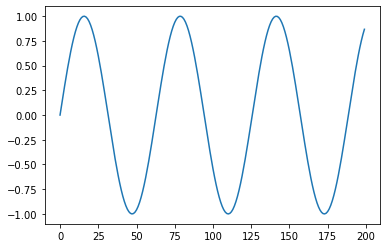

In [2]:
# make the original data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [3]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [4]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 7ms/sample - loss: 1.0263 - val_loss: 0.1221
Epoch 2/80
95/95 [==============================] - 0s 312us/sample - loss: 0.4687 - val_loss: 0.5114
Epoch 3/80
95/95 [==============================] - 0s 299us/sample - loss: 0.4102 - val_loss: 0.0245
Epoch 4/80
95/95 [==============================] - 0s 250us/sample - loss: 0.0385 - val_loss: 0.1581
Epoch 5/80
95/95 [==============================] - 0s 265us/sample - loss: 0.2579 - val_loss: 0.1372
Epoch 6/80
95/95 [==============================] - 0s 242us/sample - loss: 0.1064 - val_loss: 0.0106
Epoch 7/80
95/95 [==============================] - 0s 282us/sample - loss: 0.0350 - val_loss: 0.1129
Epoch 8/80
95/95 [==============================] - 0s 237us/sample - loss: 0.1110 - val_loss: 0.0501
Epoch 9/80
95/95 [==============================] - 0s 257us/sample - loss: 0.0267 - val_loss: 0.0091
Epoch 10/80
95/95 [=====================

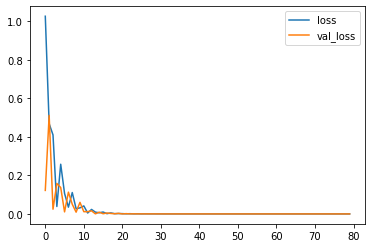

In [5]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()